In [12]:
import cv2
from pytesseract import pytesseract
import numpy as np
import matplotlib.image as mpimg
import os
import glob, random
import matplotlib.pyplot as plt

home_directory = os.getcwd()


## CÓMO MEJORAR LOS OUTPUTS DE TESSERACT:
# https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html

In [7]:
## En caso de tener que hacer un procesamiento del crop:

'''
Por ejemplo, jugar con un crop de Tesseract sacado tal cual e intentar mejorarlo
'''

## En caso de tener que pasar el pdf a png:

()

'This defines the time reversed measurement operators Mp(i) for the readout 7\n\n \n\x0c'

Clase: paragraph
--------------------------------------------------
study of equivalent formulations of (9), and also for their automatic occurence on
Ste melihd ese WIE Becta,

 



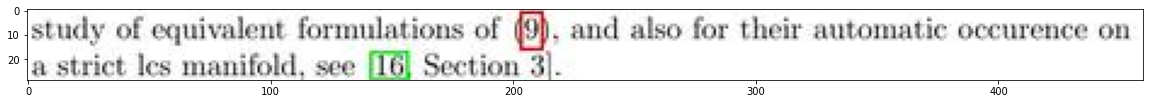

Clase: equation
--------------------------------------------------
igure 13. The integrated Ny,-Nevw relation of Cv Lya clumps at the 2 different redshift bins with the left. panel for the full redshif
Fe a are ee ea eee



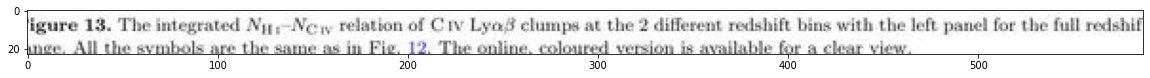

Clase: paragraph
--------------------------------------------------
Proposition 3.1. The order complex |NC(W)| of the non-crossing partition lattie
associated to a finite Coxeter group W of rank n embeds into a spherical building A o
type An. In particular, dim(|NC(W)}) = dim(A).

 

   



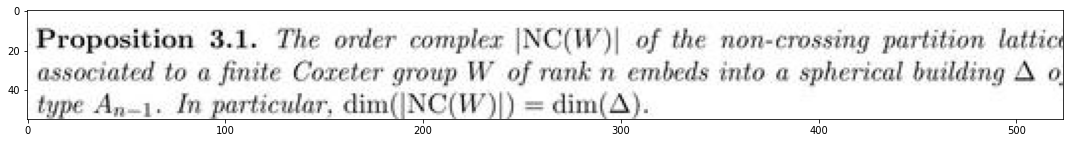

In [27]:
## Cogemos un crop random para hacer el OCR

'''
Lo ideal sería almacenar este texto en archivos json que se organicen en DynamoDB de AWS,
con campos que se hayan inferido del recuadro de la anotación, la clasificación del documento,
y el tipo de información contenida en el propio texto
'''

file_path_type = [home_directory+"/crops/*.png"]
for i in range(3):   
    images = glob.glob(random.choice(file_path_type))
    random_image = random.choice(images)
    
    clase = random_image.split('__')[-1].split('.png')[0]
    
    print('Clase: ' + clase)
    print('-'*50)
    
    image = cv2.imread(random_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    
    ## Aquí pondríamos condicionales para, por ejemplo, extraer el crop de la firma directamente
    ## sin pasarla por OCR
    ## Ejemplo:
    
    '''
    if clase == 'firma':
         mpimg.imsave(home_directory + '/firmas/firma_Nombre.png', image)
    '''
    
    
    # usamos Tesseract para el OCR de la imagen
    text = pytesseract.image_to_string(image)
    print(text)
    plt.figure(figsize = (20,2))
    plt.imshow(image)
    plt.show()


In [18]:
img_name.split('__')[-1]

'/home/rcruz/PycharmProjects/ocr/crops/*.png'

In [20]:
random_image

'/home/rcruz/PycharmProjects/ocr/crops/7_12.tar_1601.05676.gz_ms_3_ori__paragraph.png'